# Census Income

#### Project Drescription:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

**Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
# Inporting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data Set
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
df=pd.read_csv(url)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Hare We have the dataset of Census Income.

In [3]:
# Shape of the Data Set
df.shape

(32560, 15)

The Shape of the census income dataset is (32560,15) which means there are 32560 rows and 15 columns presents in the dataset.

In [4]:
# first 10 rows
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
# Last 10 rows
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# 10 Sample of dataset 
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
3095,22,?,175586,HS-grad,9,Never-married,?,Unmarried,Black,Female,0,0,35,United-States,<=50K
5331,23,Private,174626,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States,<=50K
70,31,Private,309974,Bachelors,13,Separated,Sales,Own-child,Black,Female,0,0,40,United-States,<=50K
21604,28,Private,100829,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,50,United-States,>50K
28791,39,Private,126161,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,<=50K
25444,57,Private,127779,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
29728,40,Private,115331,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,35,United-States,<=50K
11940,58,Self-emp-inc,78104,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
27272,61,Self-emp-not-inc,243493,HS-grad,9,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,12,United-States,<=50K
3519,30,Private,221043,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,<=50K


From the head method we get the 1st 10 rows of the data set and from the tail method we get last 10 rows of the dataset similarly from the sample method we get the random sample data of the dataset. from the sample method we have seen that there is some missing data in the form of question mark (?).

In [8]:
# checking for missing data
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Hare we can notice that there is no missing data present in the data set. but erlier in the sample method we have seen that there are missing data present in the form of question mark. hence we need to check each unique value present in the dataset.

In [9]:
# checking for columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

we can notice all the column names. out of all columns Income column is the target variable and all others column is features.

In [15]:
# Checking basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the basic information we can notice that 
1. There are 32560 rows in the dataset indexed from 0 to 32559. 
2. There are total 15 columns present out of which 6 column are numerical column and 9 columns are objective column
3. The count of non-Null indicates that there are no missing value present in the dataset.

In [12]:
# checking unique values in each column
for i in df.columns:
    print(i,'\n','-'*80)
    print(df[i].unique(),"\n\n")

Age 
 --------------------------------------------------------------------------------
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 


Workclass 
 --------------------------------------------------------------------------------
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 


Fnlwgt 
 --------------------------------------------------------------------------------
[ 83311 215646 234721 ...  34066  84661 257302] 


Education 
 --------------------------------------------------------------------------------
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 


Education_num 
 -----------------------

from the unique value we can see that there is missing value present in the form of question mark (?) in the "Workclass", 'Occupation', "Native_country" column. and in the column 'Capital_gain' and 'Capital_loss' there are some missing value present in the form of 0. As the Income column possess only 2 unique data hence we need to prepare the classification model.

In [17]:
# Checking the no of unique value present in each column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [18]:
# checking for unique value with its countings
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

for the above value_counts method we can notice that 
1. In the column Workclass there are 1836 missing value present, 
2. In the column Occupation there are 1843 missing value present,
3. In the column Capital_gain there are 29849 zero value present,
4. in the column Capital_loss there are 31041 zero value present. 

In the dataset there are total 32560 data present in each column out of which in the column Capital_gain and Capital_loss majority no of data is zero hence we need not change those value with their mean or median value.
In the column Workclass and Occupation there are few no of missing value present as compared to the total no of data. hence we can repalce those missing value with their mode value. 

In [71]:
# replacing the question mark (?) with their mode value
df['Workclass']=df['Workclass'].replace(' ?', df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].replace(' ?', df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].replace(' ?', df['Native_country'].mode()[0])

In [72]:
# checking wheather the value has been replaced or not
print('For the column Workclass:\n',df['Workclass'].unique())
print('For the column Occupation:\n', df['Occupation'].unique())
print('For the column Native_country:\n', df['Native_country'].unique())

For the column Workclass:
 [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
For the column Occupation:
 [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
For the column Native_country:
 [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


Hence all the question mark value has been replaced with its mode value.

In [73]:
# Checking Statistical Summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32560.0,NaN,NaN,NaN,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Workclass,32560,8,Private,24532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fnlwgt,32560.0,NaN,NaN,NaN,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education,32560,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_num,32560.0,NaN,NaN,NaN,10.08059,2.572709,1.0,9.0,10.0,12.0,16.0
Marital_status,32560,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32560,14,Prof-specialty,5983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32560,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32560,5,White,27815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32560,2,Male,21789,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the df.describe include all method we can get all the statistical summary for objective column as well as numerical columns. hare we can notice that 
1. Count is same for all the column which indicates that there is no missing value present in the dataset.
2. Unique value for object data type is shown in the describe method.
3. In the top column we have the most frequent value.
4. For the numerical column mean is close to the median value in each numerical column excetpt Fnlwgt column which indicates that data of these columns are normally distributed.
5. In the column Fnlwgt column mean is greater than median hence it is the case of right skewness.
6. In all the numerical column the difference between 75th percentile and the max value is high as compared to the difference between 75th and 50th percentile value. which indicates there are huge no of outliers present in the dataset. 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


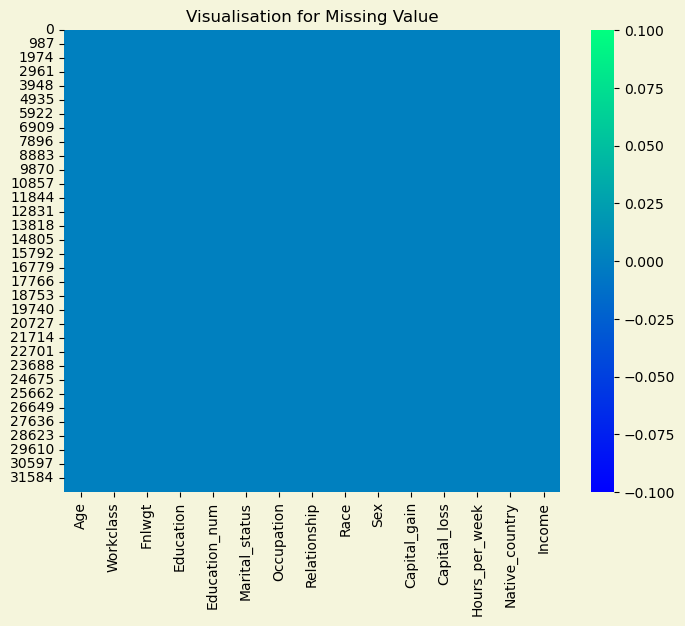

In [74]:
# checking for missing value present in the dataset
print(df.isnull().sum())
plt.figure(figsize=(8,6), facecolor='beige')
plt.title('Visualisation for Missing Value')
sns.heatmap(df.isnull(), cmap='winter')
plt.show()

From the above plot we can confirm that there is no missing data present in the dataset.

In [75]:
# Checking for Categorical columns
Categorical_col = []
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Categorical_col.append(i)
    elif df.dtypes[i]!='object':
        numerical_col.append(i)
print('Categorical Columns :',Categorical_col)
print("Numerical Columns :",numerical_col)

Categorical Columns : ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numerical Columns : ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


## Data Visualisastion

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


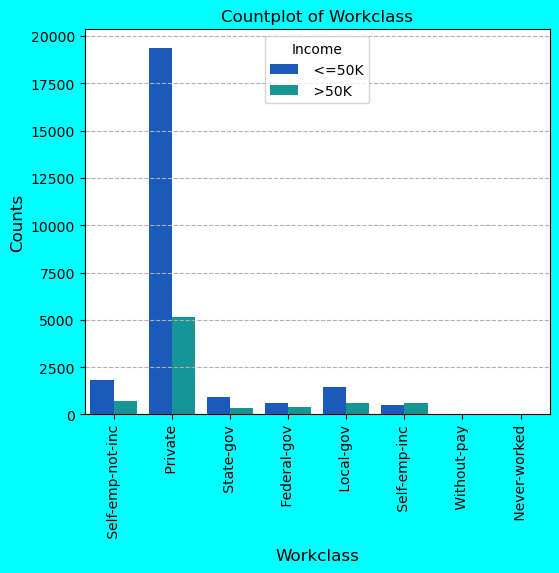

In [76]:
# count plot of Workclass
print(df['Workclass'].value_counts())
plt.figure(figsize=(6,5), facecolor='cyan')
plt.title("Countplot of Workclass")
sns.countplot(data=df, x='Workclass', hue='Income', palette='winter')
plt.xlabel("Workclass", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(which='major',axis='y',linestyle='--')
plt.show()

Most of the person works in Private work place in which income less than equal to 50k person is in very higher size.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


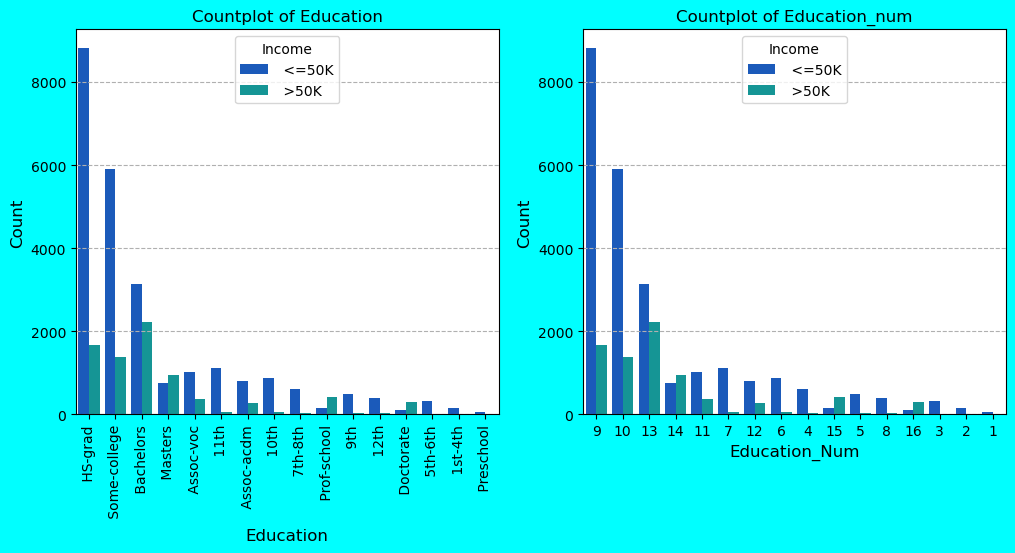

In [77]:
# count plot of Education
print(df['Education'].value_counts())
plt.figure(figsize=(12,5), facecolor='cyan')

plt.subplot(121)
plt.title("Countplot of Education")
sns.countplot(data=df, x='Education', hue='Income',order=df['Education'].value_counts().index, palette='winter')
plt.xlabel("Education", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(axis='y',linestyle='--')

plt.subplot(122)
plt.title("Countplot of Education_num")
sns.countplot(data=df, x='Education_num', hue='Income',order=df['Education_num'].value_counts().index, palette='winter')
plt.xlabel('Education_Num', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

From the above graph we can notice that Education and Education_num is the symetric column as it possesses same no of unique value, same no of counts for each category. hence we can conclude that Education_num is the numerical representation of Education column. hence for the purpose of model building we can drop either of any column.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


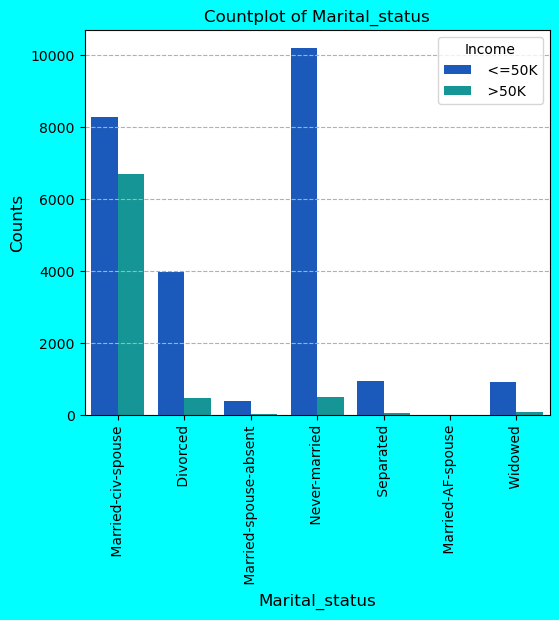

In [78]:
# count plot of Marital_status
print(df['Marital_status'].value_counts())
plt.figure(figsize=(6,5), facecolor='cyan')
plt.title("Countplot of Marital_status")
sns.countplot(data=df, x='Marital_status', hue='Income', palette='winter')
plt.xlabel("Marital_status", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(axis='y',linestyle='--')
plt.show()

the count of never married person is high those who are earning <=50k.

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


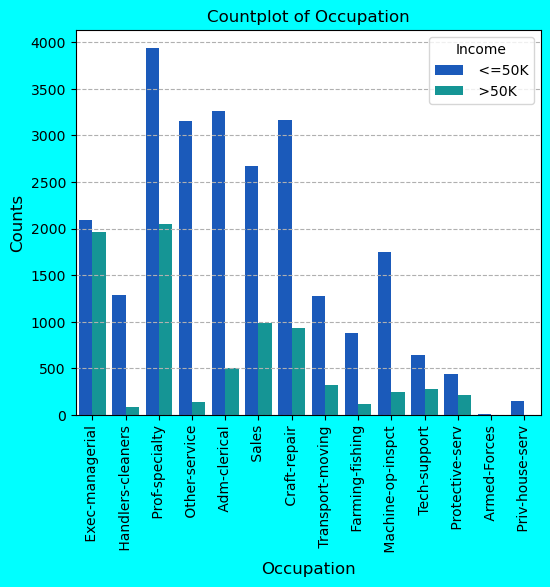

In [79]:
# count plot of Occupation
print(df['Occupation'].value_counts())
plt.figure(figsize=(6,5), facecolor='cyan')
plt.title("Countplot of Occupation")
sns.countplot(data=df, x='Occupation', hue='Income', palette='winter')
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(axis='y',linestyle='--')
plt.show()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


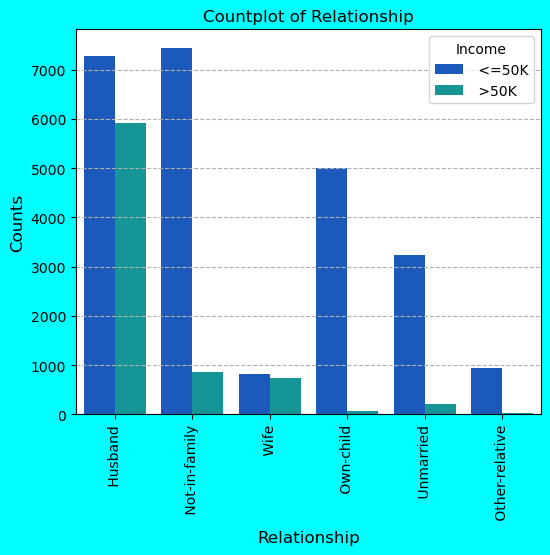

In [80]:
# count plot of Relationship
print(df['Relationship'].value_counts())
plt.figure(figsize=(6,5), facecolor='cyan')
plt.title("Countplot of Relationship")
sns.countplot(data=df, x='Relationship', hue='Income', palette='winter')
plt.xlabel("Relationship", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(axis='y',linestyle='--')
plt.show()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


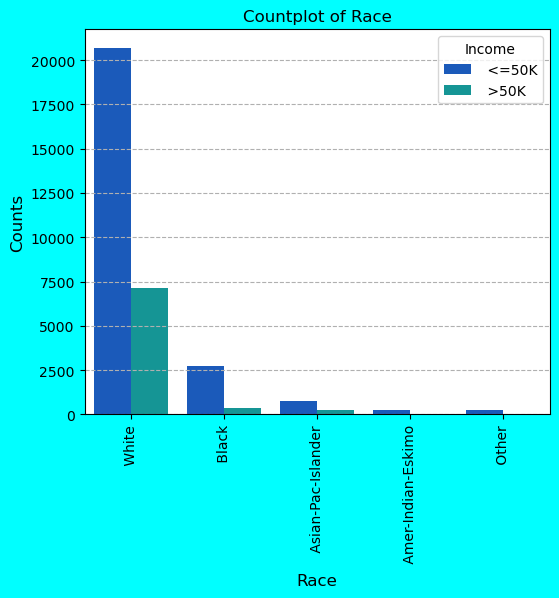

In [81]:
# count plot of Race
print(df['Race'].value_counts())
plt.figure(figsize=(6,5), facecolor='cyan')
plt.title("Countplot of Race")
sns.countplot(data=df, x='Race', hue='Income', palette='winter')
plt.xlabel("Race", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(which='major',axis='y',linestyle='--')
plt.show()

 Male      21789
 Female    10771
Name: Sex, dtype: int64


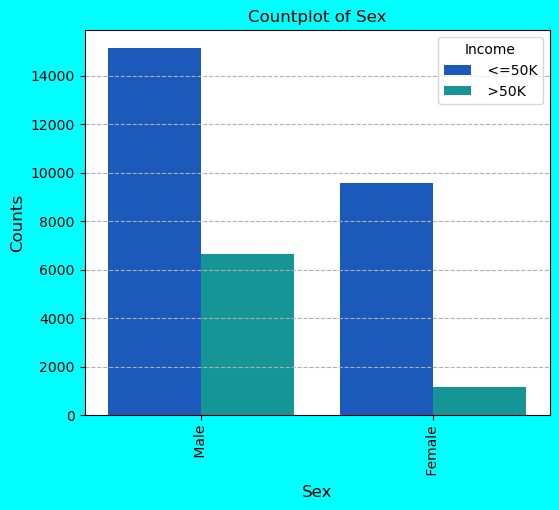

In [82]:
# count plot of Sex
print(df['Sex'].value_counts())
plt.figure(figsize=(6,5), facecolor='cyan')
plt.title("Countplot of Sex")
sns.countplot(data=df, x='Sex', hue='Income', palette='winter')
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(which='major',axis='y',linestyle='--')
plt.show()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

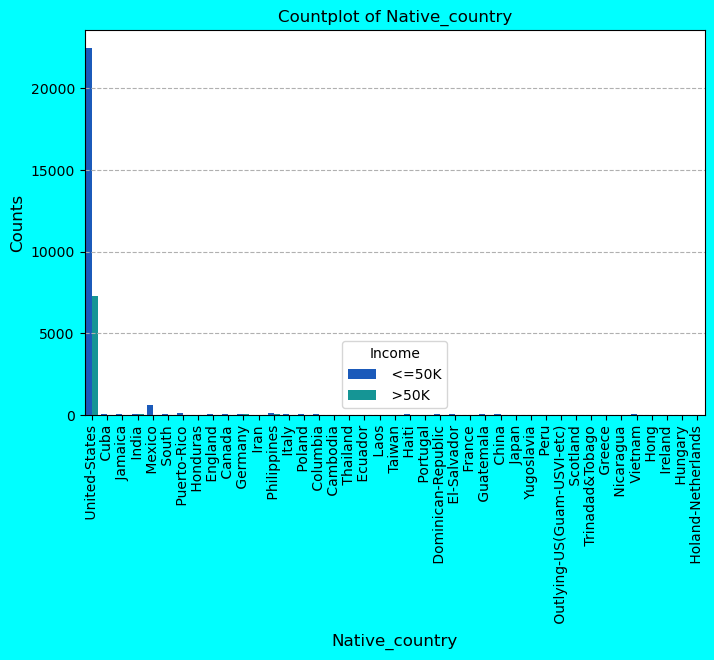

In [85]:
# count plot of Native_country
print(df['Native_country'].value_counts())
plt.figure(figsize=(8,5), facecolor='cyan')
plt.title("Countplot of Native_country")
sns.countplot(data=df, x='Native_country', hue='Income', palette='winter')
plt.xlabel("Native_country", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(which='major',axis='y',linestyle='--')
plt.show()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


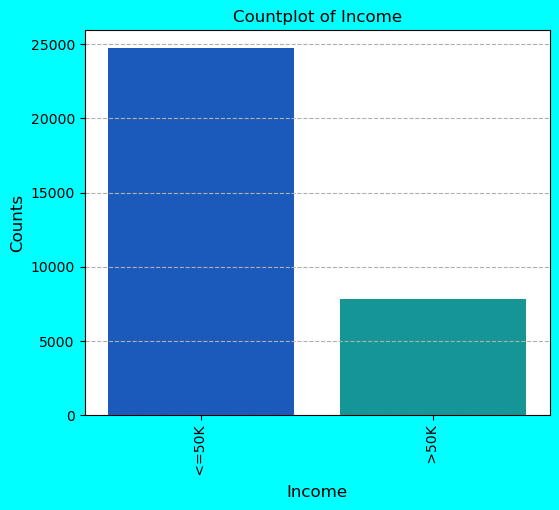

In [84]:
# count plot of Income
print(df['Income'].value_counts())
plt.figure(figsize=(6,5), facecolor='cyan')
plt.title("Countplot of Income")
sns.countplot(data=df, x='Income', palette='winter')
plt.xlabel("Income", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.grid(which='major',axis='y',linestyle='--')
plt.show()

out of 32560 people 24719 people are earning <=50K and 7841 people earning >50K.

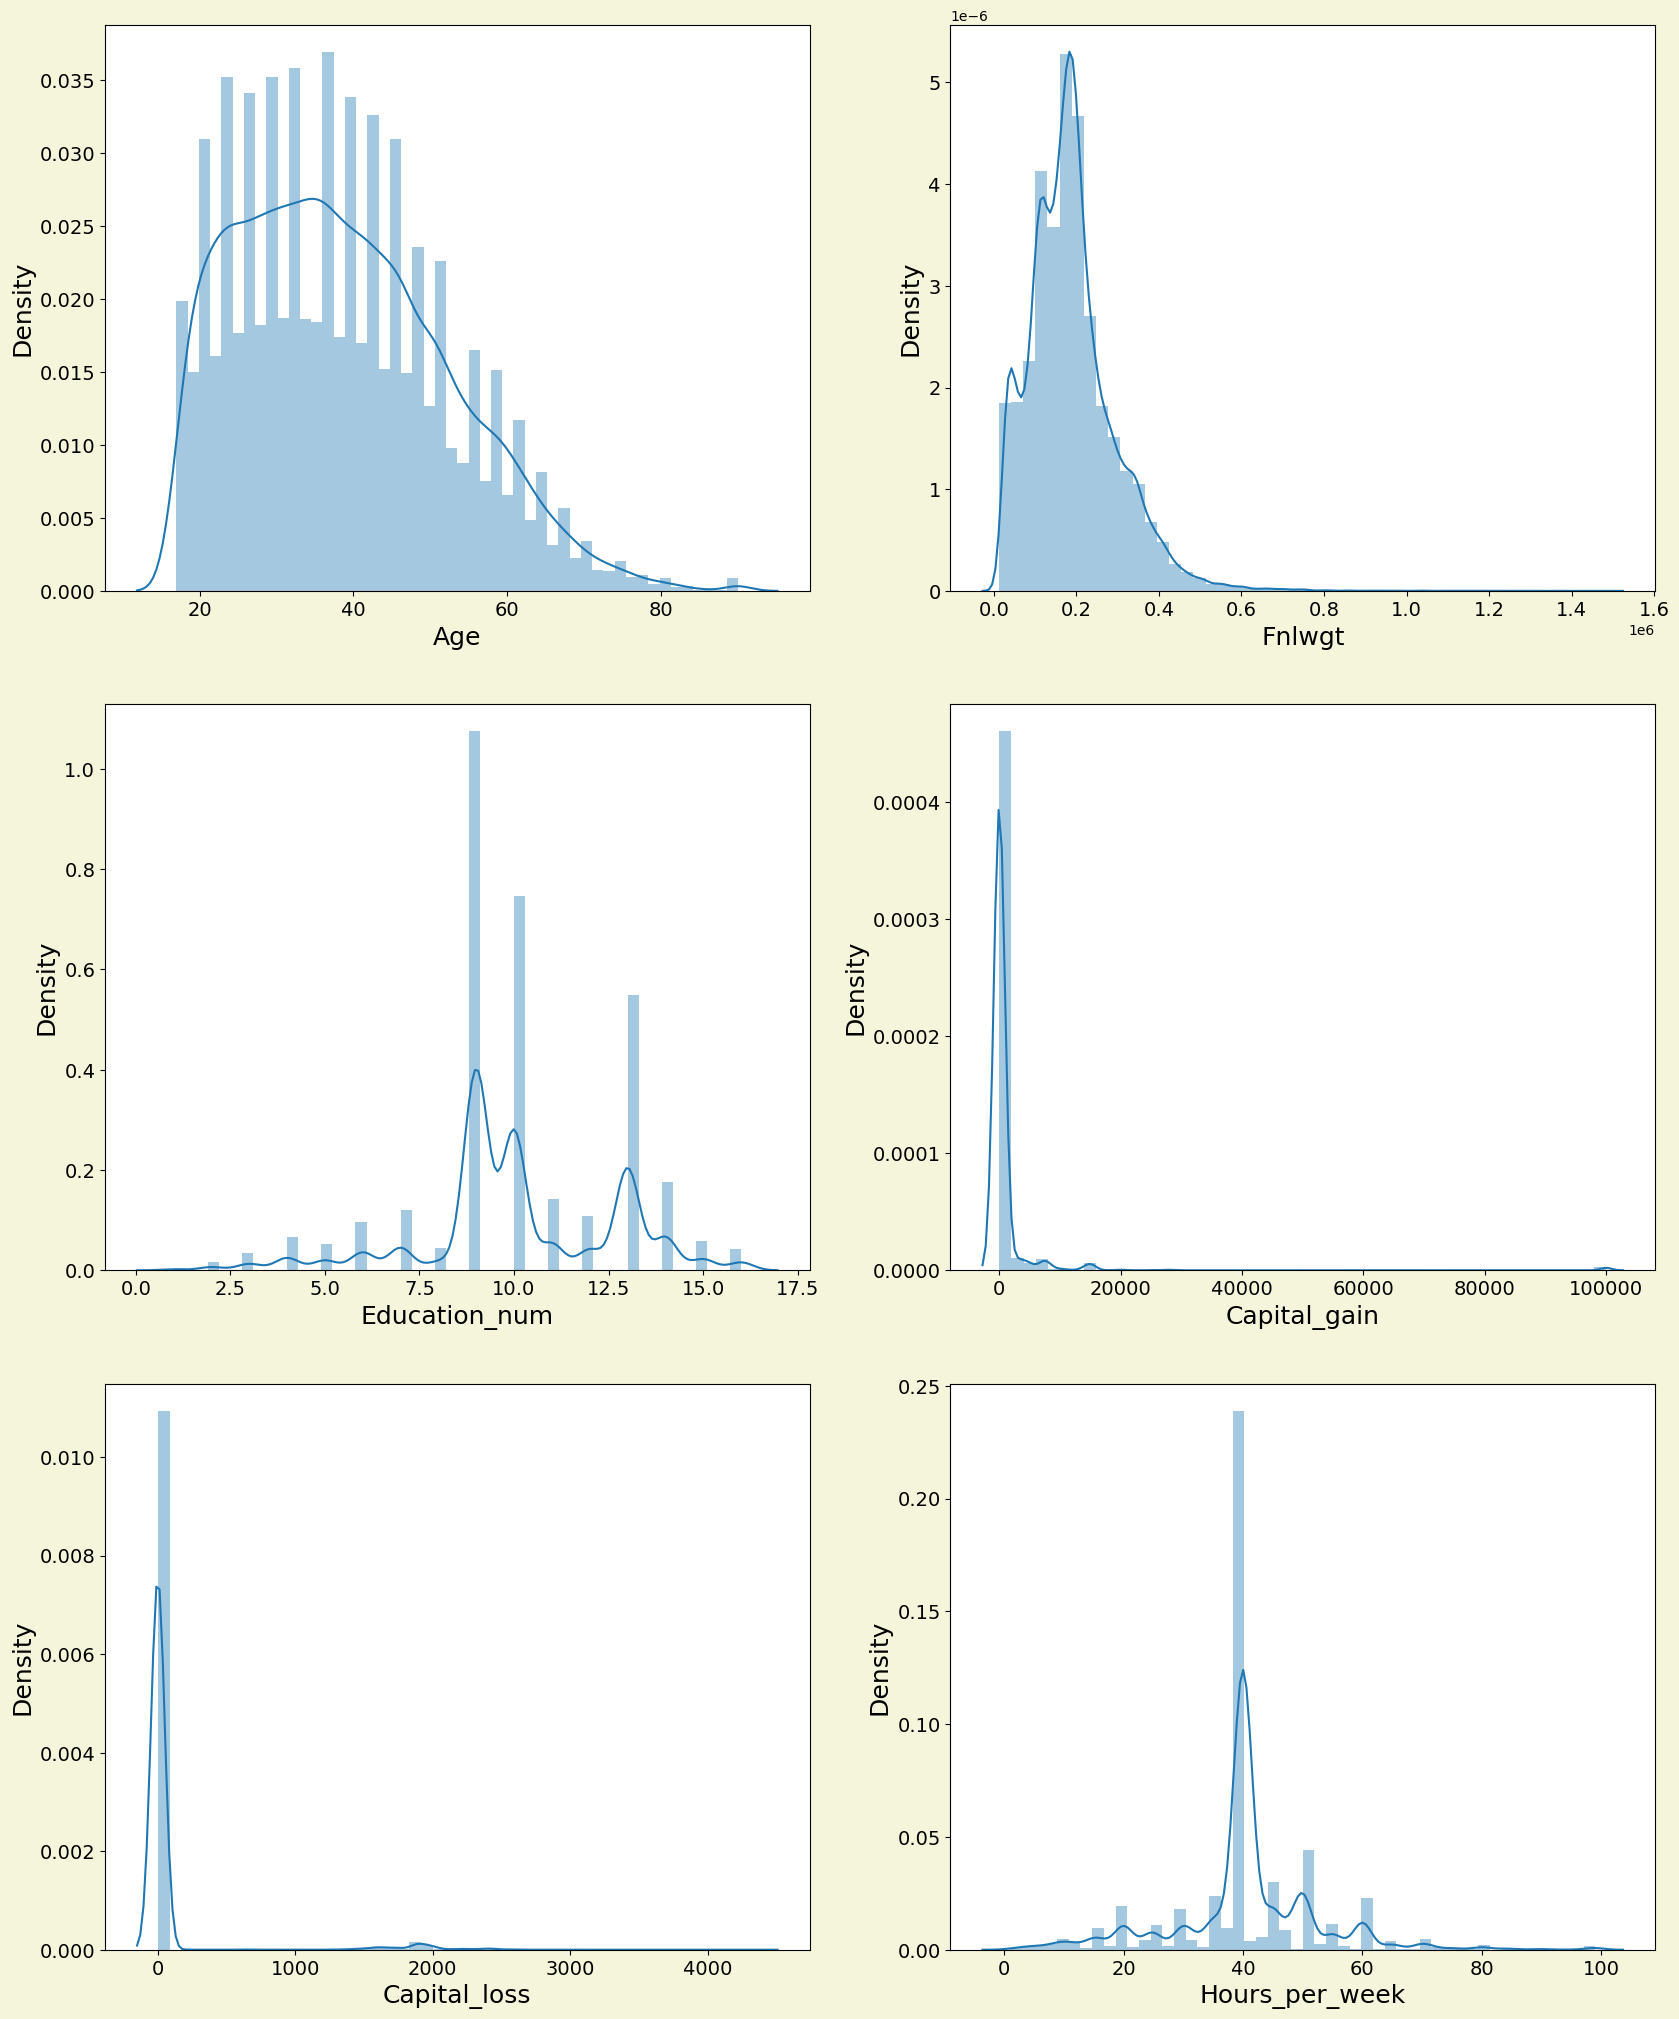

In [89]:
# distribution plot of numerical column
pltnum=1
plt.figure(figsize=(20,25), facecolor='beige')
for i in numerical_col:
    if pltnum<=6:
        plt.subplot(3,2,pltnum)
        sns.distplot(df[i], kde=True)
        plt.xlabel(i, fontsize=18)
        plt.ylabel('Density', fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
    pltnum+=1
plt.show()

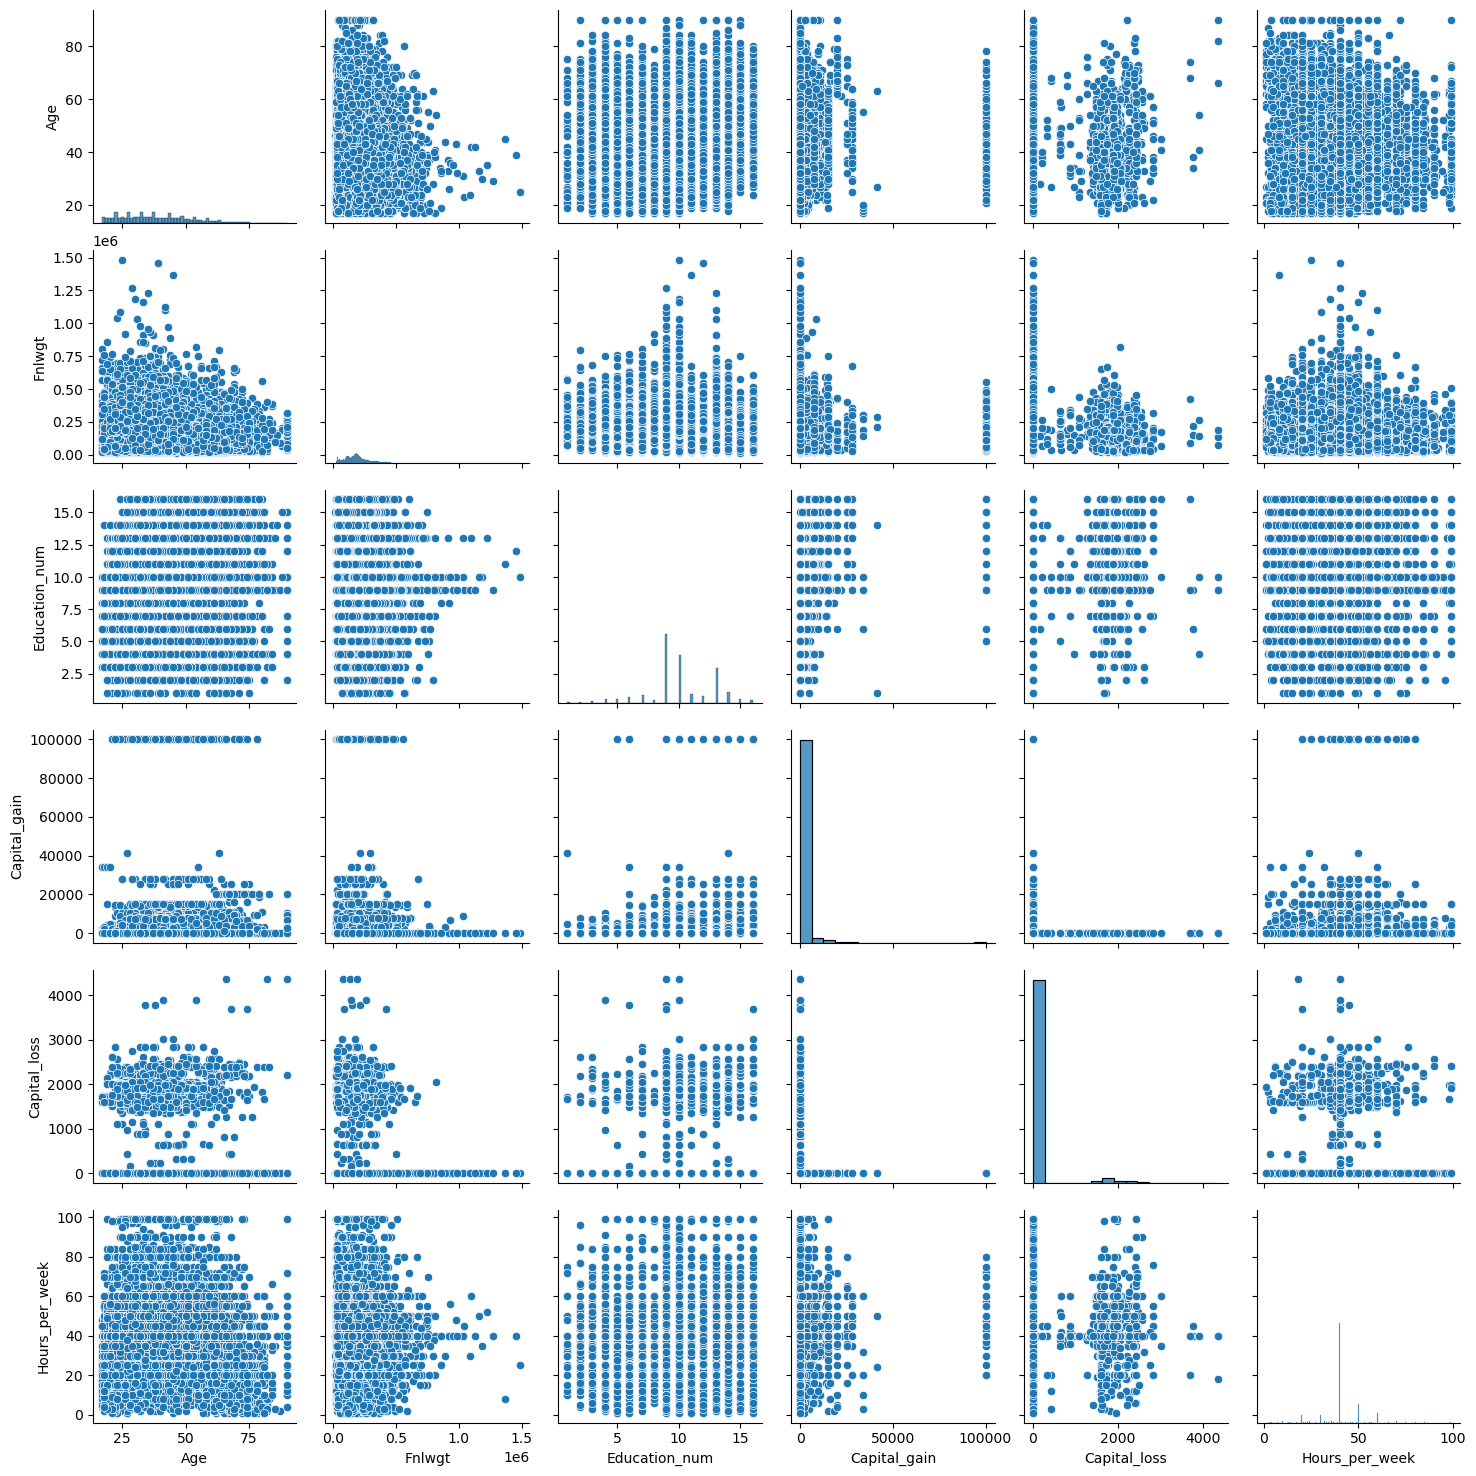

In [91]:
# checking pairplot
sns.pairplot(df)

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.

These fields are : 'age','education.num', 'capital.gain','capital.loss', 'hours.per.week'

These fields are some what showing neutral correlation with each other.

The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation.

### Data Preprocessing

In [94]:
# droping irrelavent column
df.drop('Education', axis=1, inplace=True)

In [95]:
#checking skewness
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

The permisible skewness for the numerical column is from -0.5 to +0.5. Fnlwgt, Capital_gain and  Capital_loss column contains skewness.

In [96]:
# Removing skewness using yeo johnson to get better predictions
from sklearn.preprocessing import PowerTransformer
skewness = PowerTransformer(method='yeo-johnson')
df[['Fnlwgt','Capital_gain', 'Capital_loss']] = skewness.fit_transform(df[['Fnlwgt','Capital_gain', 'Capital_loss']].values)
# again checking the skewness
df.skew()

Age               0.558738
Fnlwgt            0.016914
Education_num    -0.311630
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
dtype: float64

somehow skewness is removed in Fnlwgt column but still there are skewness present in Capital_gain, Capital_loss column as there are most of the column possesses zero value.

In [116]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Now we need to remove the outliers for that we can use zscore method and IQR method.

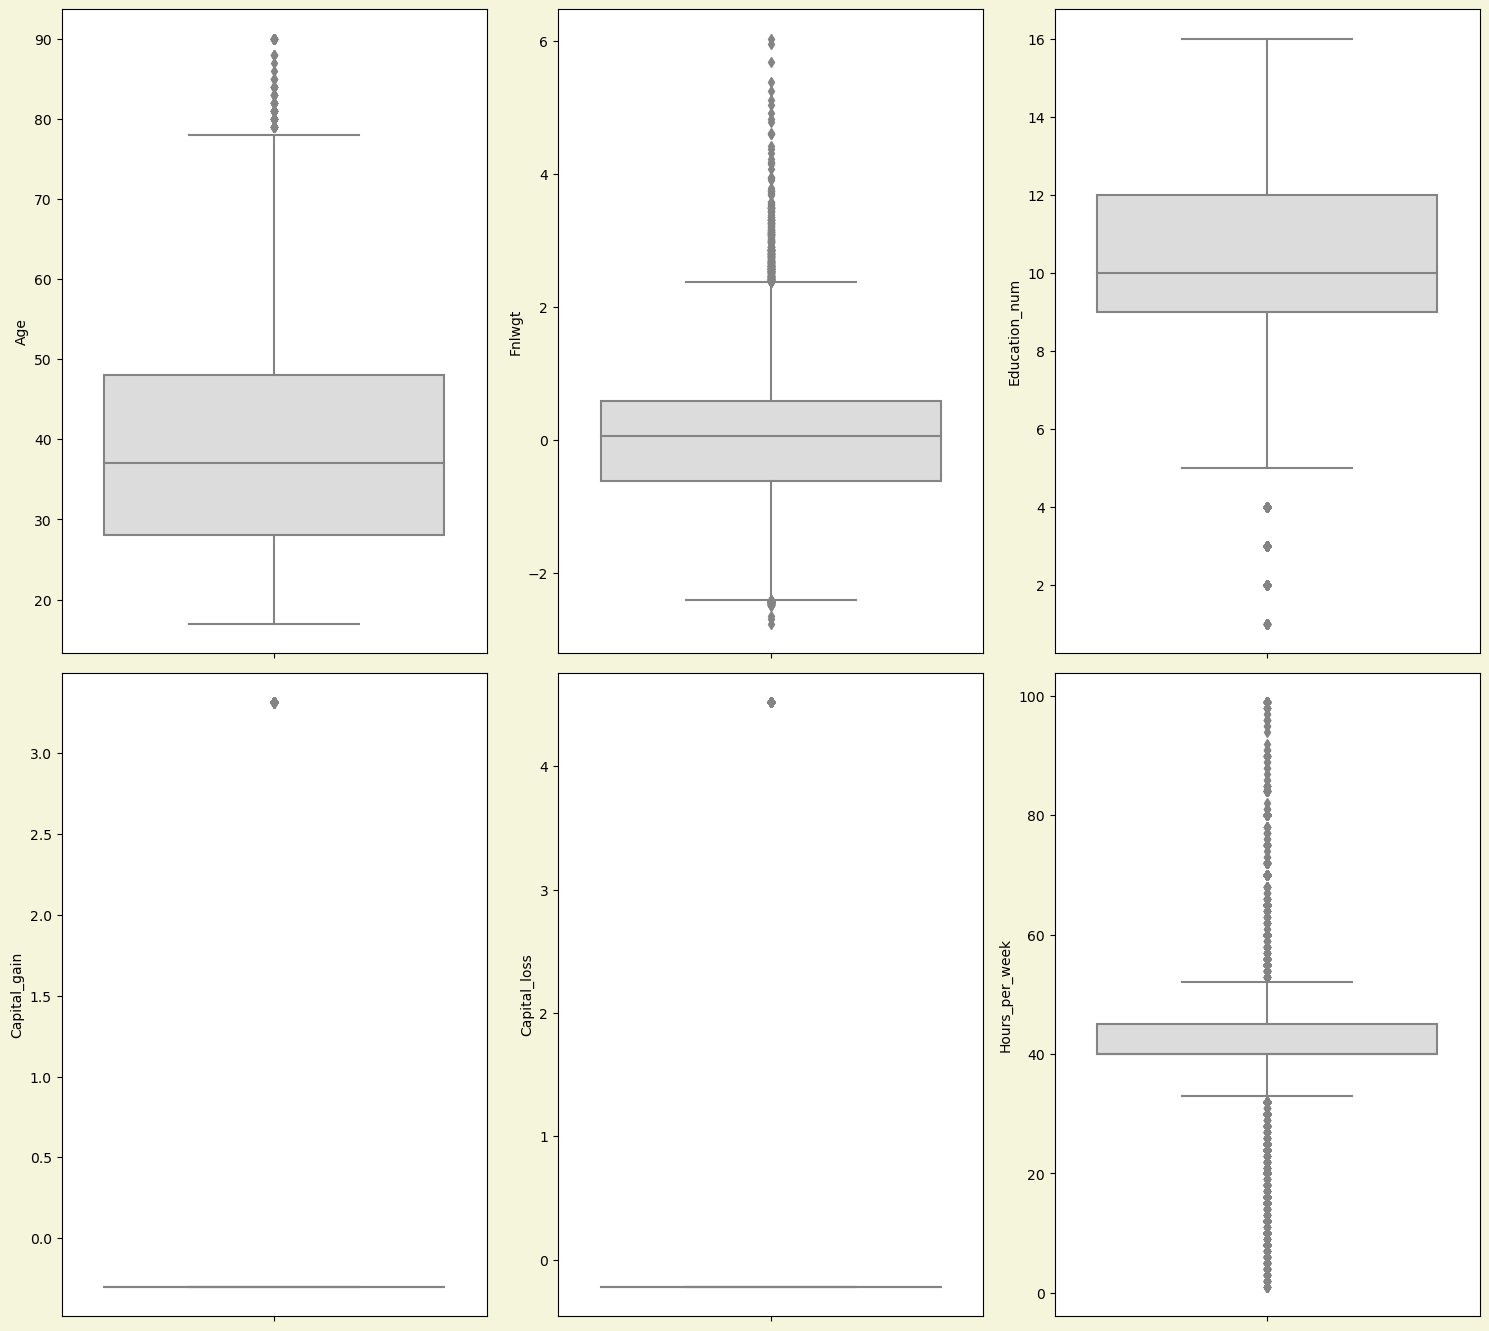

In [98]:
# Checking boxplot in each column
plotnum=1
plt.figure(figsize=(15,20),facecolor='beige')
for i in numerical_col:
    if plotnum<=9:
        plt.subplot(3,3,plotnum)
        sns.boxplot(data=df,y=i,palette='coolwarm')
    plotnum+=1
plt.tight_layout()

There are huge outliers present in each numerical column. hence we need to remove those outliers.

#### Zscore method

In [101]:
# Using zscore to remove outliers
data=df[numerical_col]
from scipy.stats import zscore
z=np.abs(zscore(data))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.837097,1.089889,1.134779,0.301370,0.221213,2.222120
1,0.042640,0.398743,0.420027,0.301370,0.221213,0.035430
2,1.057031,0.562540,1.197429,0.301370,0.221213,0.035430
3,0.775755,1.340398,1.134779,0.301370,0.221213,0.035430
4,0.115952,0.957182,1.523480,0.301370,0.221213,0.035430
...,...,...,...,...,...,...
32555,0.849066,0.746749,0.746077,0.301370,0.221213,0.197407
32556,0.103982,0.193298,0.420027,0.301370,0.221213,0.035430
32557,1.423589,0.219755,0.420027,0.301370,0.221213,0.035430
32558,1.215624,0.271668,0.420027,0.301370,0.221213,1.655200


In [102]:
# index position of data having zscore more than 3
np.where(z>3)

(array([    7,     8,     9, ..., 32537, 32547, 32559], dtype=int64),
 array([3, 3, 5, ..., 3, 3, 3], dtype=int64))

In [103]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df.shape

(27571, 14)

In [104]:
# data loss percentage in zscore method
((32560-27571)/32560)*100

15.322481572481571

near about 15% data loss in zscore method.

#### IQR Method

In [105]:
# 1st quantile
Q1 = data.quantile(0.25)

# 3rd quantile
Q3 = data.quantile(0.75)

# IQR
IQR = Q3-Q1
df1 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df1.shape

(19392, 14)

In [106]:
# data loss percentage
((32560-19392)/32560)*100

40.44226044226044

in IQR method we have seen that the data loss percentage is near about 44%. hence in zscore method dataloss percentage is minimum and we will consider the zscore method for model preparation.

## Encoding

In [111]:
# using lebel encoder encoding the 
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
# Checking for Categorical columns
Categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Categorical_col.append(i)
new_df[Categorical_col] = new_df[Categorical_col].apply(lbl.fit_transform)

In [112]:
new_df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,-1.089889,13,2,3,0,4,1,-0.30137,-0.221213,13,37,0
1,38,3,0.398743,9,0,5,1,4,1,-0.30137,-0.221213,40,37,0
2,53,3,0.562540,7,2,5,0,2,1,-0.30137,-0.221213,40,37,0
3,28,3,1.340398,13,2,9,5,2,0,-0.30137,-0.221213,40,4,0
4,37,3,0.957182,14,2,3,5,4,0,-0.30137,-0.221213,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,3,1.144034,10,4,10,1,4,1,-0.30137,-0.221213,40,37,0
32555,27,3,0.746749,12,2,12,5,4,0,-0.30137,-0.221213,38,37,0
32556,40,3,-0.193298,9,2,6,0,4,1,-0.30137,-0.221213,40,37,1
32557,58,3,-0.219755,9,6,0,4,4,0,-0.30137,-0.221213,40,37,0


In [113]:
# Checking the correlation between features and label
cor = new_df.corr()
cor

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.032471,-0.069851,0.031178,-0.293068,-0.005116,-0.268094,0.021955,0.079172,NaN,NaN,0.098596,-0.000119,0.225817
Workclass,0.032471,1.000000,-0.024343,-0.000679,-0.015642,0.009462,-0.058421,0.048110,0.067596,NaN,NaN,0.023997,-0.000846,-0.010979
Fnlwgt,-0.069851,-0.024343,1.000000,-0.037571,0.029252,-0.005981,0.010093,-0.012116,0.025634,NaN,NaN,-0.017568,-0.067446,-0.005958
Education_num,0.031178,-0.000679,-0.037571,1.000000,-0.051462,0.065134,-0.090187,0.025823,0.002566,NaN,NaN,0.139664,0.062485,0.295424
Marital_status,-0.293068,-0.015642,0.029252,-0.051462,1.000000,0.039639,0.188823,-0.064955,-0.119035,NaN,NaN,-0.197623,-0.016420,-0.187358
Occupation,-0.005116,0.009462,-0.005981,0.065134,0.039639,1.000000,-0.038302,-0.003490,0.052552,NaN,NaN,-0.024670,-0.000436,0.030170
Relationship,-0.268094,-0.058421,0.010093,-0.090187,0.188823,-0.038302,1.000000,-0.116296,-0.565584,NaN,NaN,-0.255738,-0.012562,-0.236946
Race,0.021955,0.048110,-0.012116,0.025823,-0.064955,-0.003490,-0.116296,1.000000,0.088874,NaN,NaN,0.043343,0.114218,0.069557
Sex,0.079172,0.067596,0.025634,0.002566,-0.119035,0.052552,-0.565584,0.088874,1.000000,NaN,NaN,0.230150,0.002875,0.200934
Capital_gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


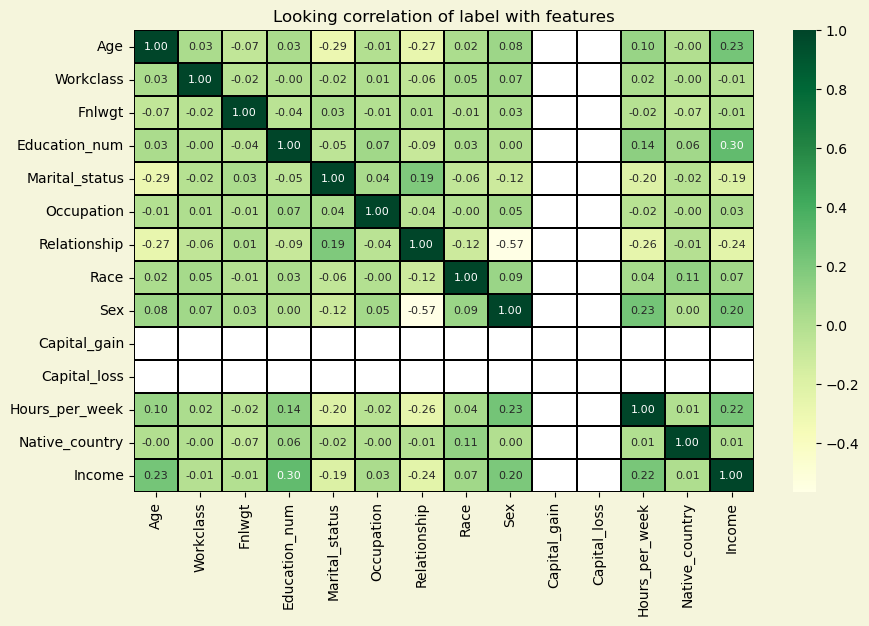

In [117]:
# visualizing corr value
plt.figure(figsize=(10,6), facecolor='beige')
plt.title("Looking correlation of label with features")
sns.heatmap(cor,linewidths=0.1,annot=True,linecolor='black',fmt='0.2f',annot_kws={'size':8},cmap="YlGn")
plt.show()

From the corellation matrix we can see that
1. none of the column is very strongly correlated with the label.
2. the correlation matrix doed not find any correlation in Catital_gain and Capital_loss column. In these column most of the value is consist of zero. hence we can drop these column.


In [118]:
# dropping irrelavent column
new_df.drop(['Capital_gain', 'Capital_loss'], axis=1, inplace=True)
new_df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.089889,13,2,3,0,4,1,13,37,0
1,38,3,0.398743,9,0,5,1,4,1,40,37,0
2,53,3,0.562540,7,2,5,0,2,1,40,37,0
3,28,3,1.340398,13,2,9,5,2,0,40,4,0
4,37,3,0.957182,14,2,3,5,4,0,40,37,0


Hence we can see that Capital_gain and Capital_loss column has been removed.

## Feature Engineering

In [119]:
# Seperating feature and label
x=new_df.drop('Income', axis=1)
y=new_df['Income']

# Checking feature and label shape
print('Shape of feature=', x.shape)
print('Shape of Label=', y.shape)

Shape of feature= (27571, 11)
Shape of Label= (27571,)


In [120]:
# Feature Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.932377,1.747644,-1.101511,1.235414,-0.426207,-0.777423,-0.946049,0.400482,0.729076,-2.392741,0.260490
1,0.028116,-0.077173,0.416271,-0.410591,-1.734194,-0.276017,-0.321653,0.400482,0.729076,0.031052,0.260490
2,1.158442,-0.077173,0.583276,-1.233594,-0.426207,-0.276017,-0.946049,-1.935888,0.729076,0.031052,0.260490
3,-0.725435,-0.077173,1.376366,1.235414,-0.426207,0.726793,2.175930,-1.935888,-1.371599,0.031052,-5.383828
4,-0.047239,-0.077173,0.985645,1.646916,-0.426207,-0.777423,2.175930,0.400482,-1.371599,0.031052,0.260490


In [121]:
# Checking Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]

vif

,Features,VIF values
0,Age,1.169990
1,Workclass,1.008038
2,Fnlwgt,1.012453
3,Education_num,1.039046
4,Marital_status,1.142495
5,Occupation,1.011564
6,Relationship,1.645084
7,Race,1.031915
8,Sex,1.518560
9,Hours_per_week,1.129263


Vif value in any column is not greater than 10 not even greater than 5 hence there is no issue of multicolinearity problem.

### Model Selection

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [123]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)


r2_score corresponding to random state:  42 is:  0.18252858788273074
r2_score corresponding to random state:  43 is:  0.19515581578112828
r2_score corresponding to random state:  44 is:  0.1850949464609828
r2_score corresponding to random state:  45 is:  0.19200065228500285
r2_score corresponding to random state:  46 is:  0.1861757215712445
r2_score corresponding to random state:  47 is:  0.19009943247287708
r2_score corresponding to random state:  48 is:  0.1914262802567137
r2_score corresponding to random state:  49 is:  0.19808913608449974
r2_score corresponding to random state:  50 is:  0.20013944028348118
r2_score corresponding to random state:  51 is:  0.19074313833445344
r2_score corresponding to random state:  52 is:  0.19097494887844957
r2_score corresponding to random state:  53 is:  0.19982326986591947
r2_score corresponding to random state:  54 is:  0.21098204620985261
r2_score corresponding to random state:  55 is:  0.18569051936320036
r2_score corresponding to random stat

#### LASSO

In [124]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.001}

In [125]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.01)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.18049411316927422
r2_score corresponding to random state:  43 is:  0.19149419356288233
r2_score corresponding to random state:  44 is:  0.18321444555034805
r2_score corresponding to random state:  45 is:  0.18750301474853281
r2_score corresponding to random state:  46 is:  0.18252419693452115
r2_score corresponding to random state:  47 is:  0.18563950040047317
r2_score corresponding to random state:  48 is:  0.18804420248338738
r2_score corresponding to random state:  49 is:  0.19388311015053572
r2_score corresponding to random state:  50 is:  0.1960020596713561
r2_score corresponding to random state:  51 is:  0.18613682855496716
r2_score corresponding to random state:  52 is:  0.18743849336676222
r2_score corresponding to random state:  53 is:  0.19556573219858608
r2_score corresponding to random state:  54 is:  0.20504813569951785
r2_score corresponding to random state:  55 is:  0.18481386201047523
r2_score corresponding to random st

### Logistic Regression

Gaussian NB SVC Decision Tree Classifier KNeighbors Classifier

In [126]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [127]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(22056, 11) (5515, 11)
(22056,) (5515,)


In [128]:
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [129]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

In [130]:
models

[('LogisticRegression', LogisticRegression()),
 ('GaussianNB', GaussianNB()),
 ('SVC', SVC()),
 ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=10)),
 ('KNeighborsClassifie', KNeighborsClassifier())]

**************** LogisticRegression ****************


LogisticRegression()


ACCURACY SCORE =  0.8261106074342702


CROSS_VAL_SCORE =  0.8306556085202595


ROC_AUC_SCORE =  0.6175524413608979


CLASSIFICATION REPORT = 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4462
           1       0.59      0.28      0.38      1053

    accuracy                           0.83      5515
   macro avg       0.72      0.62      0.64      5515
weighted avg       0.80      0.83      0.80      5515



CONFUSION MATRIX 
 [[4261  201]
 [ 758  295]]


AxesSubplot(0.125,0.807358;0.62x0.0726415)


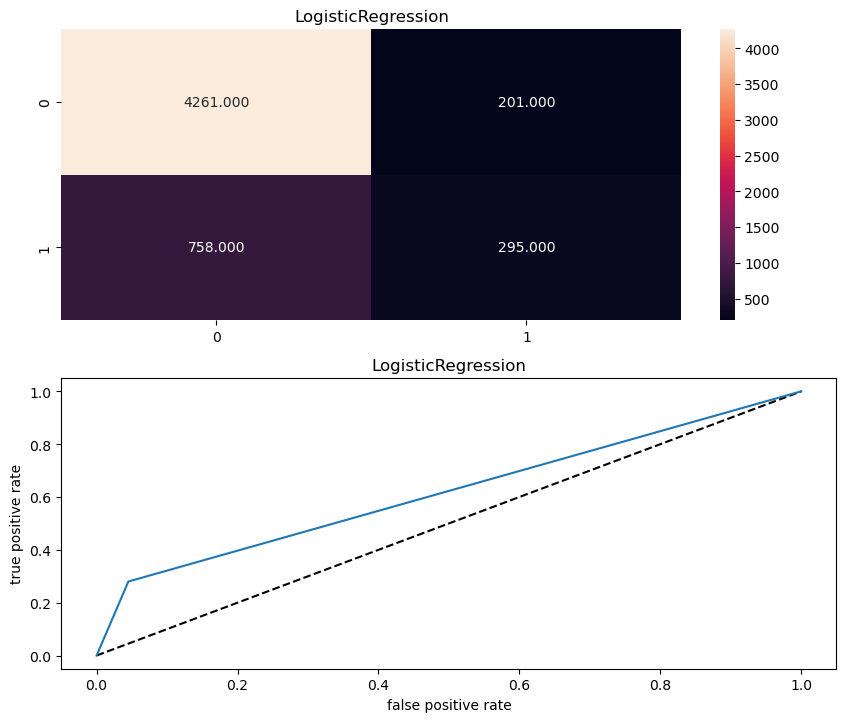




**************** GaussianNB ****************


GaussianNB()


ACCURACY SCORE =  0.7981867633726202


CROSS_VAL_SCORE =  0.8019298756438552


ROC_AUC_SCORE =  0.7457689562127034


CLASSIFICATION REPORT = 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      4462
           1       0.48      0.66      0.56      1053

    accuracy                           0.80      5515
   macro avg       0.70      0.75      0.71      5515
weighted avg       0.83      0.80      0.81      5515



CONFUSION MATRIX 
 [[3706  756]
 [ 357  696]]


AxesSubplot(0.125,0.807358;0.62x0.0726415)


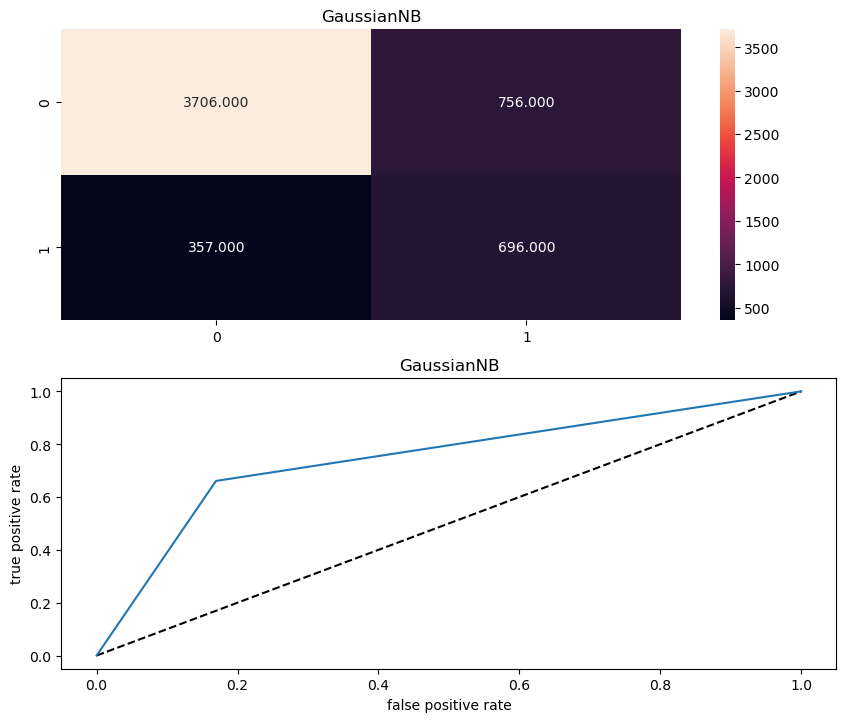




**************** SVC ****************


SVC()


ACCURACY SCORE =  0.843699002719855


CROSS_VAL_SCORE =  0.8465420606469971


ROC_AUC_SCORE =  0.6632485443183188


CLASSIFICATION REPORT = 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4462
           1       0.66      0.37      0.48      1053

    accuracy                           0.84      5515
   macro avg       0.76      0.66      0.69      5515
weighted avg       0.83      0.84      0.83      5515



CONFUSION MATRIX 
 [[4262  200]
 [ 662  391]]


AxesSubplot(0.125,0.807358;0.62x0.0726415)


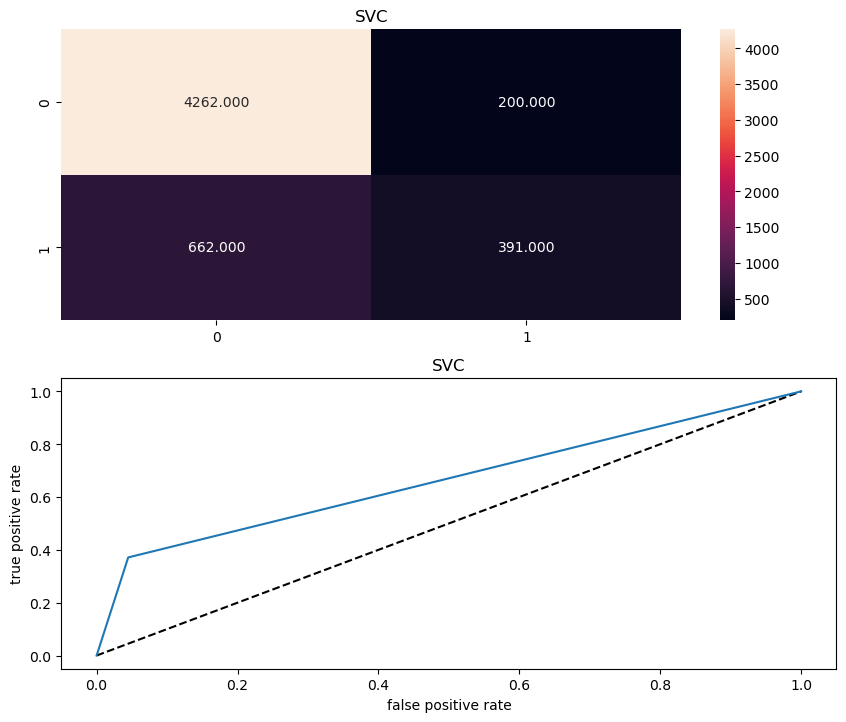




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(random_state=10)


ACCURACY SCORE =  0.7972801450589302


CROSS_VAL_SCORE =  0.7961626322396969


ROC_AUC_SCORE =  0.6828111225616081


CLASSIFICATION REPORT = 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4462
           1       0.47      0.50      0.48      1053

    accuracy                           0.80      5515
   macro avg       0.68      0.68      0.68      5515
weighted avg       0.80      0.80      0.80      5515



CONFUSION MATRIX 
 [[3873  589]
 [ 529  524]]


AxesSubplot(0.125,0.807358;0.62x0.0726415)


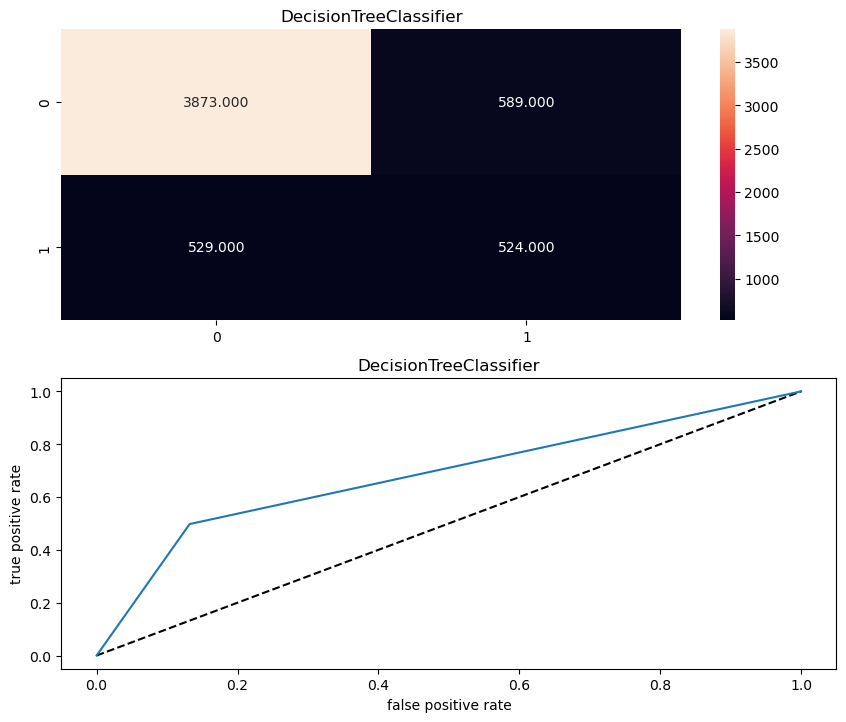




**************** KNeighborsClassifie ****************


KNeighborsClassifier()


ACCURACY SCORE =  0.8315503173164098


CROSS_VAL_SCORE =  0.8362414953774465


ROC_AUC_SCORE =  0.701813307520763


CLASSIFICATION REPORT = 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4462
           1       0.57      0.49      0.53      1053

    accuracy                           0.83      5515
   macro avg       0.73      0.70      0.71      5515
weighted avg       0.82      0.83      0.83      5515



CONFUSION MATRIX 
 [[4068  394]
 [ 535  518]]


AxesSubplot(0.125,0.807358;0.62x0.0726415)


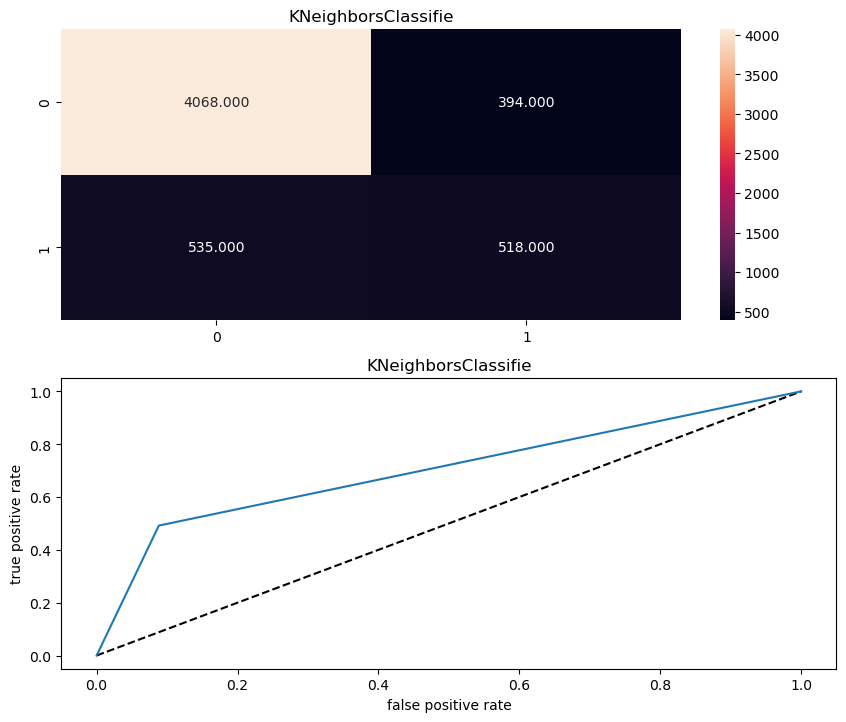

In [133]:
Model = [] # empty list
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************') # model name
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)  # model traing
    print(model)
    pred=model.predict(x_test)  # model predicting
    print('\n')
    AS= accuracy_score(y_test,pred)  # Accuracy Score of the model
    print('ACCURACY SCORE = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()  # cross validation score of the model
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)  # roc curve for the model
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = \n',classification_report(y_test,pred))  # classification report
    print('\n')
    cm=confusion_matrix(y_test,pred)   # confusion matrix
    print('CONFUSION MATRIX \n',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True, fmt='0.3f'))  # heatmap for confusion matrix
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()
    print('\n\n')

In [134]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,82.611061,83.065561,61.755244
1,GaussianNB,79.818676,80.192988,74.576896
2,SVC,84.369900,84.654206,66.324854
3,DecisionTreeClassifier,79.728015,79.616263,68.281112
4,KNeighborsClassifie,83.155032,83.624150,70.181331


In [135]:
result['Diff b/w accuracy score and cross validation score']=np.abs(result['Accuracy_score']-result['Cross_val_score'])
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,Diff b/w accuracy score and cross validation score
0,LogisticRegression,82.611061,83.065561,61.755244,0.454500
1,GaussianNB,79.818676,80.192988,74.576896,0.374311
2,SVC,84.369900,84.654206,66.324854,0.284306
3,DecisionTreeClassifier,79.728015,79.616263,68.281112,0.111751
4,KNeighborsClassifie,83.155032,83.624150,70.181331,0.469118


##### svc is the bestmodel for this datset so far

In [136]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.32237163740975777
Mean Squared error :  0.17803898700924964
RMSE is :  0.4219466637020011


When your accuracy score is not up to the mark and in order to increase the accuracy score we are going to use here RANDOM FOREST REGRESSOR and GRADIENT BOOSTING REGRESSOR in order to increase the score for the above tests.

The boosting and bagging techniques will re enable or boost the internal parameters inorder to increse the accuracy score of the model.

In [137]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [138]:

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=48,stratify=y)
rfr=RandomForestRegressor(bootstrap=True,max_features='sqrt',min_samples_split=8,n_estimators=30)
rfr.fit(x_train, y_train)
rfr.score(x_train,y_train)
pred=rfr.predict(x_test)
rfr.score(x_train,y_train)

0.698234884366848

#### K-MEANS CLUSTERING

In [140]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kModel=kmeans.fit(new_df)

In [141]:
kModel.labels_

array([1, 0, 1, ..., 0, 1, 2])

In [143]:
pd.crosstab(new_df.Income,kModel.labels_)

col_0,0,1,2
Income,,,
0,12088,6754,3463
1,2434,2742,90


In [144]:
from sklearn.metrics import homogeneity_score
print(homogeneity_score(kModel.labels_,new_df.Income))


0.028204520424235217


In [145]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
R_forest= RandomForestClassifier(n_estimators = 100)
modelR= R_forest.fit(x_train, y_train)

# Predictions
pred_2 = modelR.predict(x_test)

print ("The accuracy of model 2 : ",accuracy_score(y_test, pred_2))
print ("The f1 score of model 2 : ", f1_score(y_test, pred_2, average = 'binary'))

The accuracy of model 2 :  0.8447869446962829
The f1 score of model 2 :  0.547568710359408


## SAVING THE MODEL

In [146]:
import pickle
filename='census_Income_Final.pkl'
pickle.dump(SVC, open(filename,'wb'))

In [147]:
#Pridicting x_test
SVC.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)